In [1]:
# Importing Modules

import cv2
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [2]:
class Encode:
    
    # Decimal to 8-bit Binary conversion
    def dectobin(num):
        temp= bin(num).replace('0b','')
        while len(temp)<8:
            temp= '0' + temp
        return temp
    
    # Transformation of a complete image to binary
    def bincodedimage(image):
        t= [[ ['#' for col in range(image.shape[2])] for col in range(image.shape[1])] for row in range(image.shape[0])]
        i= 0
        for _ in tqdm(range(image.shape[0])):
            if i >= image.shape[0]:
                break
            for j in range(image.shape[1]):
                t[i][j][0]= (Encode.dectobin(image[i][j][0]))
                t[i][j][1]= (Encode.dectobin(image[i][j][1]))
                t[i][j][2]= (Encode.dectobin(image[i][j][2]))
            i+=1
        return t
    
    #Encoding an image to another one
    def encodeimage(binoriginal, binhide):
        i= 0
        for _ in tqdm(range(len(binhide))):
            if i >= len(binhide):
                break
            for j in range(len(binhide[0])):
                binoriginal[i][j][0]= binoriginal[i][j][0][:4] + binhide[i][j][0][::-1][4:]
                binoriginal[i][j][1]= binoriginal[i][j][1][:4] + binhide[i][j][1][::-1][4:]
                binoriginal[i][j][2]= binoriginal[i][j][2][:4] + binhide[i][j][2][::-1][4:]
            i+=1
        return binoriginal
    
    # Converting Binary Coded Image to Decimal Coded Image
    def backtodecimal(image):
        t= [[ [0 for col in range(3)] for col in range(len(image[0]))] for row in range(len(image))]
        i= 0
        for _ in tqdm(range(len(image))):
            if i >= len(image):
                break
            for j in range(len(image[0])):
                t[i][j][0]= int(image[i][j][0], 2)
                t[i][j][1]= int(image[i][j][1], 2)
                t[i][j][2]= int(image[i][j][2], 2)
            i+=1
        return t

In [3]:
def flowcontrolEncoder(m,n):
    mainImage= cv2.imread(m)
    binarymainImage= Encode.bincodedimage(mainImage)
    hiddenImage= cv2.imread(n)
    binaryhiddenImage= Encode.bincodedimage(hiddenImage)
    binaryencodedImage= Encode.encodeimage(binarymainImage, binaryhiddenImage)
    mergedImage= Encode.backtodecimal(binaryencodedImage)
    return mergedImage

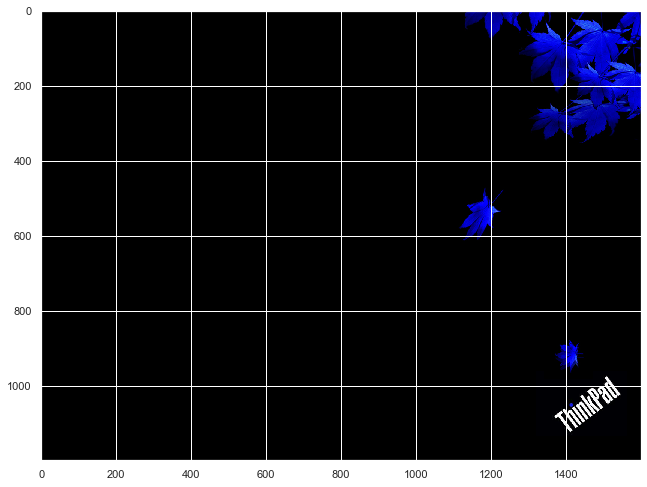

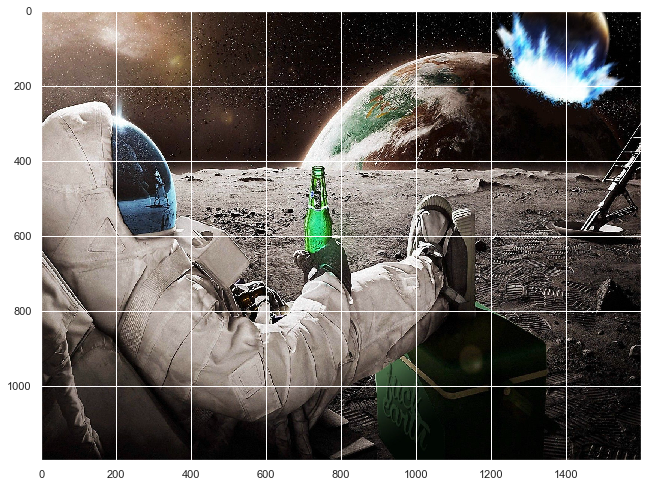

In [6]:
plt.imshow(cv2.imread('main.png'))
plt.show()
plt.imshow(cv2.imread('hide.png'))
plt.show()

100%|█████████████████████████████████████████████████████████████████████████████| 1200/1200 [00:04<00:00, 248.63it/s]


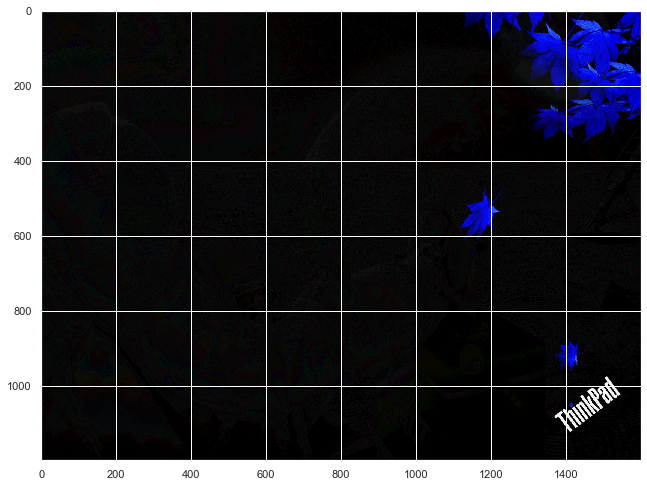

In [7]:
encode= flowcontrolEncoder(m='main.png', n='hide.png')
plt.imshow(encode)
plt.show()

In [8]:
cv2.imwrite('secret.png', np.uint8(encode))

True